In [28]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('ScrapBook.json', 'r') as j_data:
    j_data = json.load(j_data)
    print(j_data)

{
    "travel": {
        "title": [
            "It's Only the Himalayas",
            "Full Moon over Noah\u00e2\u0080\u0099s Ark: An Odyssey to Mount Ararat and Beyond",
            "See America: A Celebration of Our National Parks & Treasured Sites",
            "Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel",
            "Under the Tuscan Sun",
            "A Summer In Europe",
            "The Great Railway Bazaar",
            "A Year in Provence (Provence #1)",
            "The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2)",
            "Neither Here nor There: Travels in Europe",
            "1,000 Places to See Before You Die"
        ],
        "rate": [
            "Two",
            "Four",
            "Three",
            "Two",
            "Three",
            "Two",
            "One",
            "Four",
            "One",
            "Three",
            "Five"
        ]
    },
    "mystery": {
     

In [3]:
parsed_json = json.loads(j_data)
parsed_json

{'travel': {'title': ["It's Only the Himalayas",
   'Full Moon over Noahâ\x80\x99s Ark: An Odyssey to Mount Ararat and Beyond',
   'See America: A Celebration of Our National Parks & Treasured Sites',
   'Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel',
   'Under the Tuscan Sun',
   'A Summer In Europe',
   'The Great Railway Bazaar',
   'A Year in Provence (Provence #1)',
   'The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2)',
   'Neither Here nor There: Travels in Europe',
   '1,000 Places to See Before You Die'],
  'rate': ['Two',
   'Four',
   'Three',
   'Two',
   'Three',
   'Two',
   'One',
   'Four',
   'One',
   'Three',
   'Five']},
 'mystery': {'title': ['Sharp Objects',
   'In a Dark, Dark Wood',
   'The Past Never Ends',
   'A Murder in Time',
   'The Murder of Roger Ackroyd (Hercule Poirot #4)',
   'The Last Mile (Amos Decker #2)',
   'That Darkness (Gardiner and Renner #1)',
   'Tastes Like Fear (DI Mar

In [4]:
parsed_json.keys()

dict_keys(['travel', 'mystery', 'historical-fiction', 'sequential-art', 'classics', 'philosophy', 'romance', 'womens-fiction', 'fiction', 'childrens', 'religion', 'nonfiction', 'music', 'default', 'science-fiction', 'sports-and-games', 'add-a-comment', 'fantasy', 'new-adult', 'young-adult', 'science', 'poetry', 'paranormal', 'art', 'psychology', 'autobiography', 'parenting', 'adult-fiction', 'humor', 'horror', 'history', 'food-and-drink', 'christian-fiction', 'business', 'biography', 'thriller', 'contemporary', 'spirituality', 'academic', 'self-help', 'historical', 'christian', 'suspense', 'short-stories', 'novels', 'health', 'politics', 'cultural', 'erotica', 'crime'])

In [7]:
df_final = pd.DataFrame()
for key in parsed_json.keys():
    df = pd.DataFrame()
    df['title'] = pd.json_normalize(parsed_json[key], record_path='title')
    df['rate'] = pd.json_normalize(parsed_json[key], record_path='rate')
    df['Category'] = key
    df_final = pd.concat([df_final,df])
df_final

,title,rate,Category
0,It's Only the Himalayas,Two,travel
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,Four,travel
2,See America: A Celebration of Our National Par...,Three,travel
3,Vagabonding: An Uncommon Guide to the Art of L...,Two,travel
4,Under the Tuscan Sun,Three,travel
...,...,...,...
1,Why the Right Went Wrong: Conservatism--From G...,Four,politics
2,Equal Is Unfair: America's Misguided Fight Aga...,One,politics
0,Amid the Chaos,One,cultural
0,Dark Notes,Five,erotica


In [8]:
df_final.shape

(1000, 3)

In [9]:
df_final.isna().sum()

title       0
rate        0
Category    0
dtype: int64

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1000 non-null   object
 1   rate      1000 non-null   object
 2   Category  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [11]:
(df_final.duplicated()).value_counts()

False    999
True       1
Name: count, dtype: int64

In [12]:
df_final[df_final.duplicated() == True]

,title,rate,Category
17,The Star-Touched Queen,Five,fantasy


In [13]:
df_final.to_csv('Books_to_Scrape_Tab.csv',index=False)

In [34]:
df_final = df_final.drop_duplicates()
df_final.shape

(999, 4)

In [35]:
df_final['Category'].nunique()

50

In [36]:
df_final['rate'].value_counts()

rate
One      226
Three    203
Two      196
Five     195
Four     179
Name: count, dtype: int64

In [37]:
def transRate(x):
    rateDict = {'One':1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    return rateDict[x]

In [38]:
df_final['rateNumeric'] = df_final['rate'].apply(transRate)
df_final.head()

/tmp/ipykernel_57798/69913501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['rateNumeric'] = df_final['rate'].apply(transRate)


,title,rate,Category,rateNumeric
0,It's Only the Himalayas,Two,travel,2
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,Four,travel,4
2,See America: A Celebration of Our National Par...,Three,travel,3
3,Vagabonding: An Uncommon Guide to the Art of L...,Two,travel,2
4,Under the Tuscan Sun,Three,travel,3


In [39]:
df_group = df_final.groupby('Category').aggregate({'title':'count', 'rateNumeric':['min','max','mean','median']}).reset_index()
df_group.head()

Category title rateNumeric                     
                 count         min max      mean median
0       academic     1           2   2  2.000000    2.0
1  add-a-comment    67           1   5  2.761194    3.0
2  adult-fiction     1           5   5  5.000000    5.0
3            art     8           2   5  3.625000    4.0
4  autobiography     9           1   5  3.000000    2.0

In [40]:
df_group.columns

MultiIndex([(   'Category',       ''),
            (      'title',  'count'),
            ('rateNumeric',    'min'),
            ('rateNumeric',    'max'),
            ('rateNumeric',   'mean'),
            ('rateNumeric', 'median')],
           )

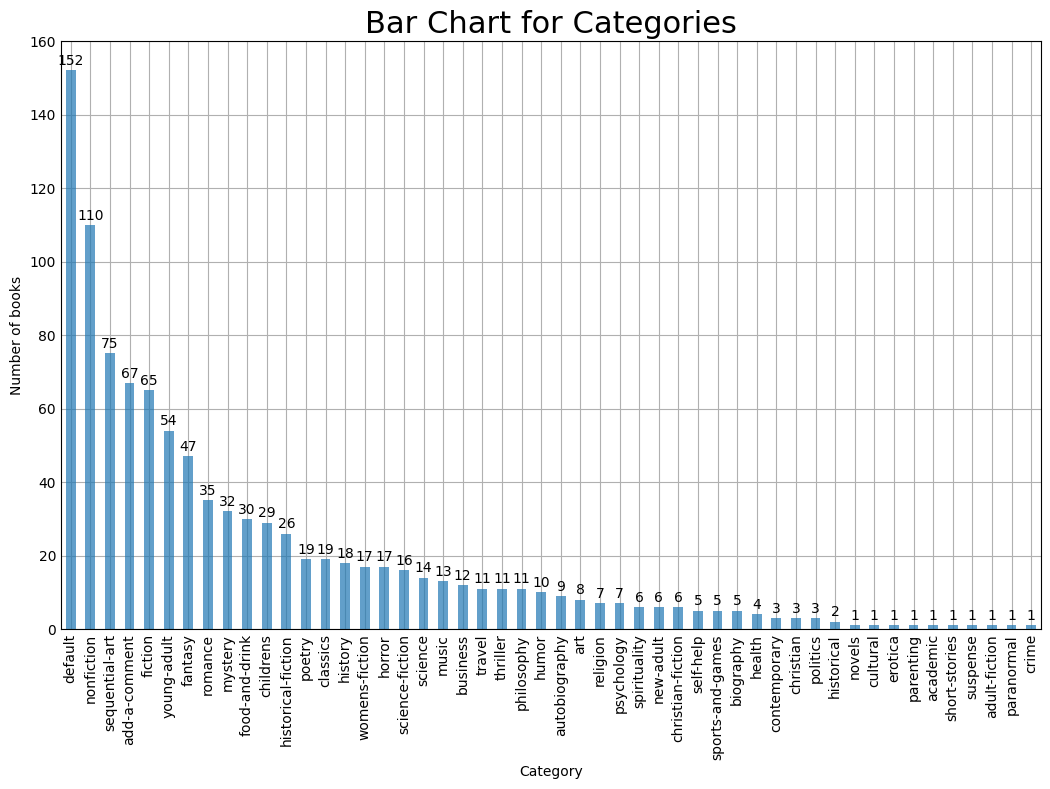

In [186]:
# Draw plot
plt.figure(figsize=(10,6))
plot=df_final['Category'].value_counts().plot(kind='bar', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df_final['Category'].value_counts()):
    plt.text(i, cty+1.5, cty, horizontalalignment='center')

# Title, Label
plot.set_title('Bar Chart for Categories', fontdict={'size':22})
plot.set(ylabel='Number of books', ylim=(0, 160))
# plot.set_xticklabels(df_group[(   'Category',       '')].str.upper())#, rotation=60)#, fontdict={'horizontalalignment': 'right', 'size':12})


plt.show()

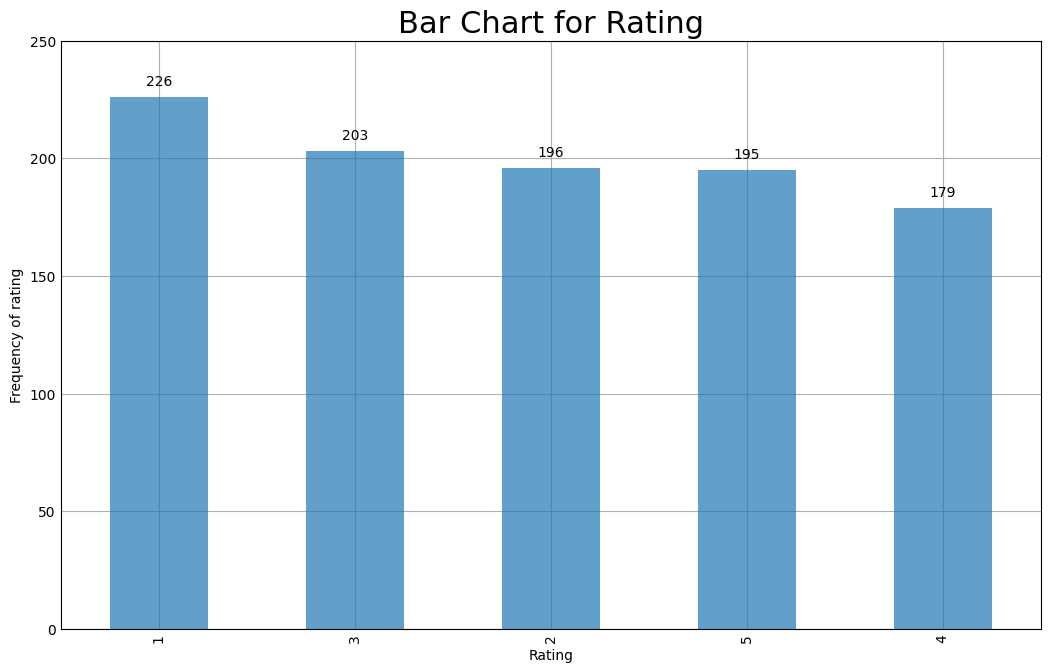

In [173]:

# Draw plot
plt.figure(figsize=(10,6))
plot=df_final['rateNumeric'].value_counts().plot(kind='bar', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df_final['rateNumeric'].value_counts()):
    plt.text(i, cty+5, cty, horizontalalignment='center')

# Title, Label
plot.set_title('Bar Chart for Rating', fontdict={'size':22})
plot.set(ylabel='Frequency of rating', ylim=(0, 250))
plot.set(xlabel='Rating')


plt.show()

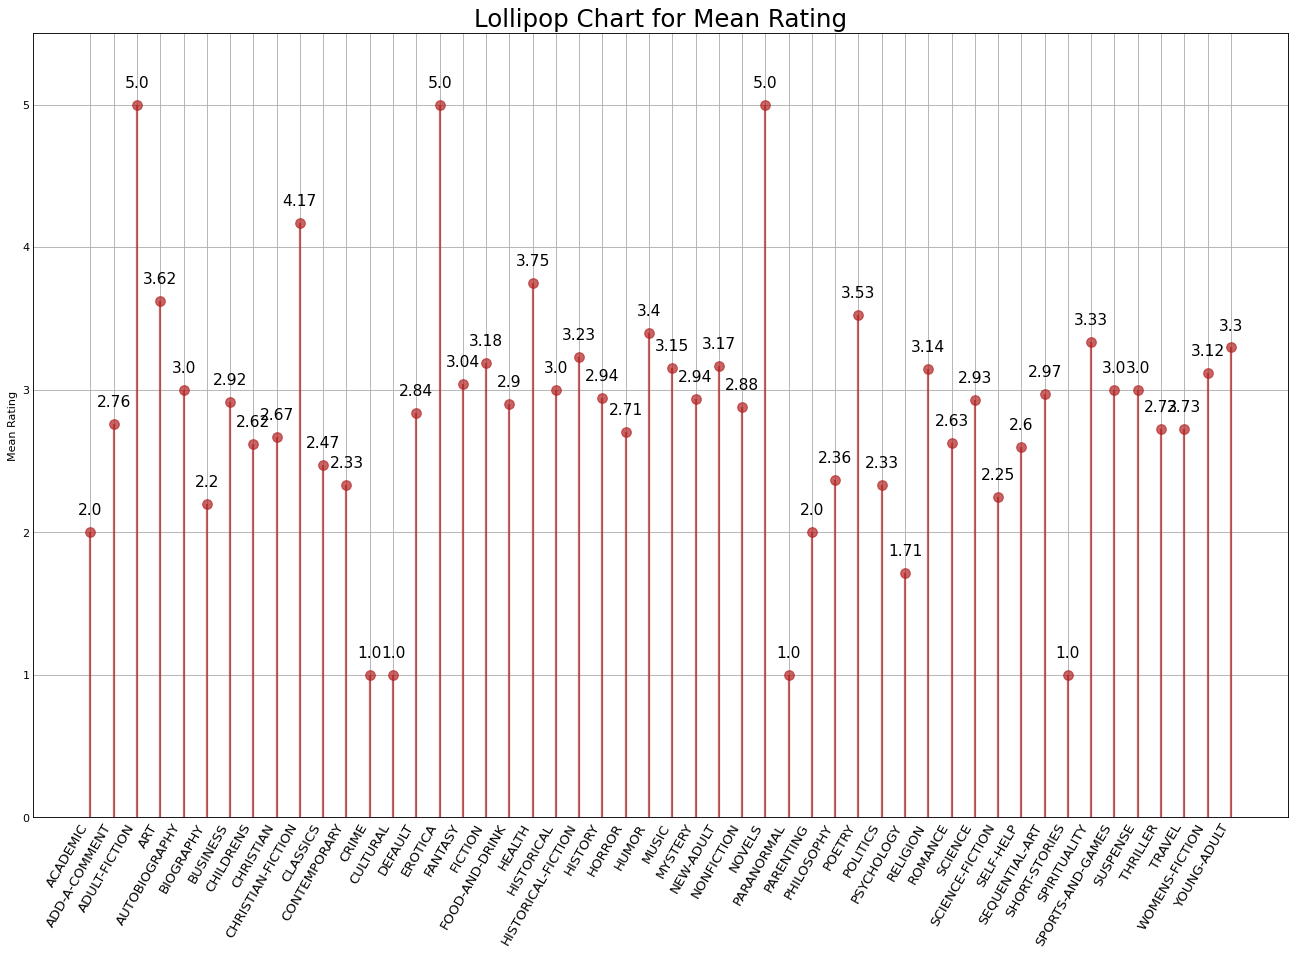

In [158]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df_group[(   'Category',       '')], ymin=0, ymax=df_group[('rateNumeric',   'mean')], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(df_group[(   'Category',       '')], df_group[('rateNumeric',   'mean')], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Mean Rating', fontdict={'size':22})
ax.set_ylabel('Mean Rating')
ax.set_xticks(df_group[(   'Category',       '')])
ax.set_xticklabels(df_group[(   'Category',       '')].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 5.5)

# Annotate
for row in df_group.itertuples():
    # print(row)
    ax.text(row.Index, row._5 + 0.1, s=round(row._5,2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

In [162]:
df_group2 = df_group.sort_values(by=[(      'title',  'count')],ascending=False)
df_group2.head()

Category title rateNumeric                     
                   count         min max      mean median
14         default   152           1   5  2.835526    3.0
28      nonfiction   110           1   5  2.881818    3.0
41  sequential-art    75           1   5  2.973333    3.0
1    add-a-comment    67           1   5  2.761194    3.0
17         fiction    65           1   5  3.184615    3.0

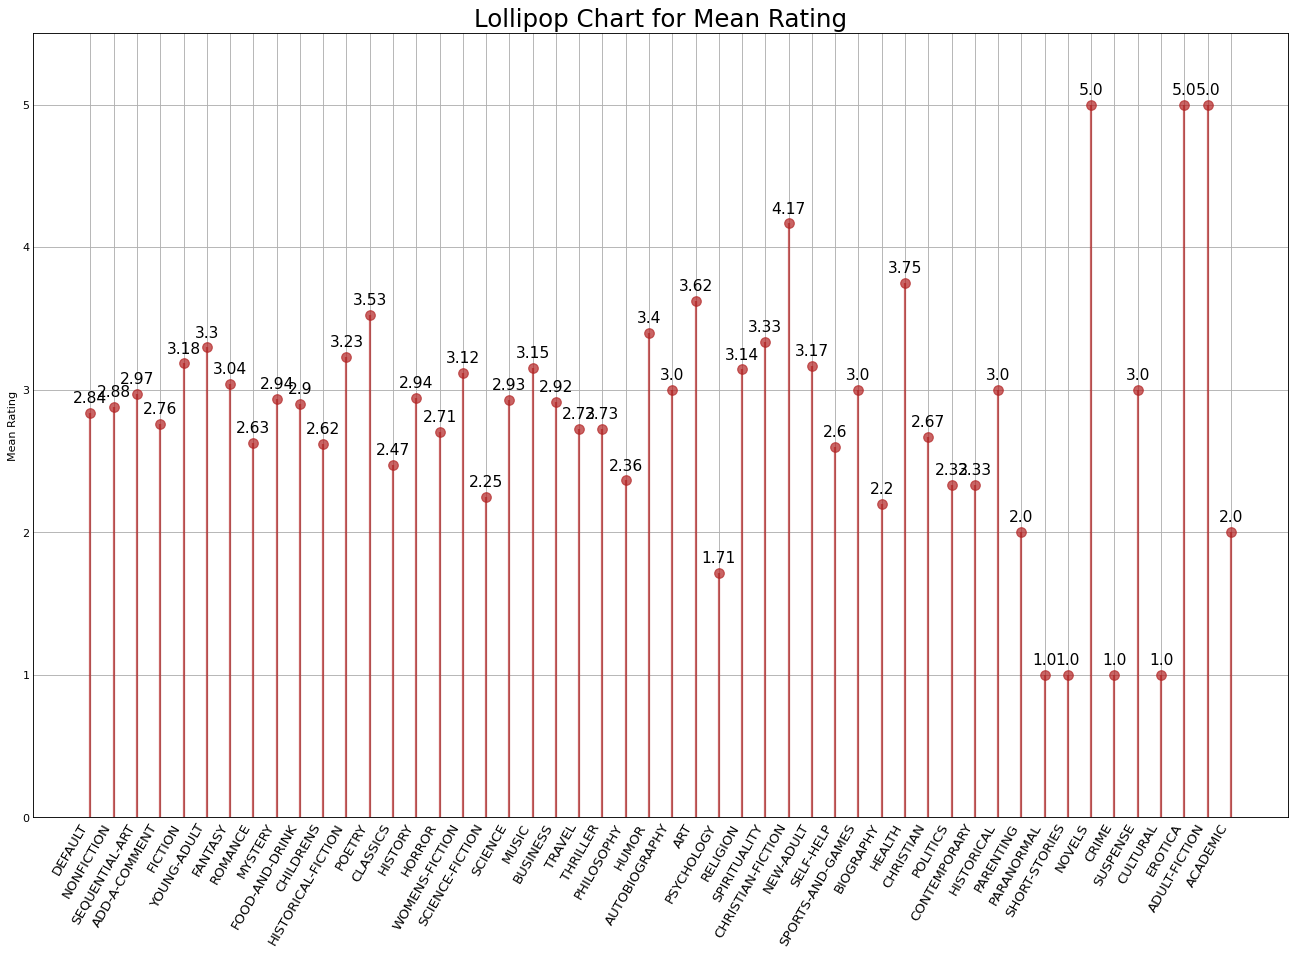

In [185]:
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df_group2[(   'Category',       '')], ymin=0, ymax=df_group2[('rateNumeric',   'mean')], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(df_group2[(   'Category',       '')], df_group2[('rateNumeric',   'mean')], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Mean Rating', fontdict={'size':22})
ax.set_ylabel('Mean Rating')
ax.set_xticks(df_group2[(   'Category',       '')])
ax.set_xticklabels(df_group2[(   'Category',       '')].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 5.5)

# Annotate
i=0
for row in df_group2.itertuples():
    # print(row)
    # print(row.Index)
    ax.text(i, row._5+0.05, s=round(row._5,2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
    i=i+1

plt.show()